Filtro Gaussiano

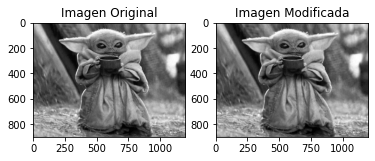

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import cv2

def filtroGaussiano(mascara):
    # Esta funcion aplica el filtro gaussiano a una imagen en escala de grises
    # Parametros de entrada: mascara = determina si la mascara a utilizar
    #                        es de 3x3 o 5x5

    A = cv2.imread('../Imagenes/baby_yoda.jpg', cv2.IMREAD_GRAYSCALE)

    A = np.double(A)

    if (mascara == 3):
        B = np.matrix('1 2 1; 2 4 2; 1 2 1')
        B = np.dot(1/16, B)
    else:
        B = np.matrix('1 4 6 4 1; 4 16 24 16 4; 6 24 36 24 6; 4 16 24 16 4; 1 4 6 4 1')
        B = np.dot(1/256, B)

    C = signal.convolve2d(A, B, mode='same')
    C = np.uint8(C)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(A, cmap='gray')
    ax1.set_title('Imagen Original')
    ax2.imshow(C, cmap='gray')
    ax2.set_title('Imagen Modificada')

    plt.show()

    return

# Ejemplo
filtroGaussiano(5)

Filtro de Sobel

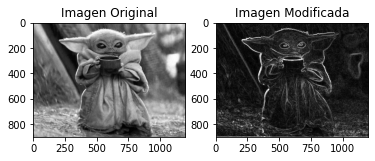

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import cv2

def filtroSobel():
    # Esta funcion aplica el filtro sobel a una imagen en escala de grises

    A = cv2.imread('../Imagenes/baby_yoda.jpg', cv2.IMREAD_GRAYSCALE)

    A = np.double(A)

    Bx = np.matrix('-1 -2 -1; 0 0 0; 1 2 1')
    By = np.matrix('-1 0 1; -2 0 2; -1 0 1')

    Cx = signal.convolve2d(A, Bx, mode='same')
    Cy = signal.convolve2d(A, By, mode='same')

    C = np.sqrt(np.add(np.power(Cx, 2), np.power(Cy, 2)))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(A, cmap='gray')
    ax1.set_title('Imagen Original')
    ax2.imshow(C, cmap='gray', vmin=0, vmax=255)
    ax2.set_title('Imagen Modificada')

    plt.show()

    return

# Ejemplo
filtroSobel()

Enfatizar Bordes

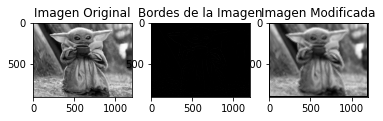

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import cv2

def enfatizarBordes(c):
    # Esta funcion aplica el filtro laplaciano a una imagen en escala de grises
    # con el fin de enfatizar sus bordes
    # Parametros de entrada: c = coeficiente que determina que tan
    #                        marcado se muestran los bordes

    A = cv2.imread('../Imagenes/baby_yoda.jpg', cv2.IMREAD_GRAYSCALE)

    A = np.double(A)
    B = np.matrix('1 1 1; 1 -8 1; 1 1 1')
    C = signal.convolve2d(A, B, mode='same')
   
    D = np.add(A, np.dot(c, C))

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(A, cmap='gray')
    ax1.set_title('Imagen Original')
    ax2.imshow(C, cmap='gray', vmin=0, vmax=255)
    ax2.set_title('Bordes de la Imagen')
    ax3.imshow(D, cmap='gray', vmin=0, vmax=255)
    ax3.set_title('Imagen Modificada')

    plt.show()

    return

# Ejemplo
enfatizarBordes(5)